In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt


In [42]:
# 데이터 불러오기
data = pd.read_excel('student_info.xls')

# 데이터 복사
data2 = data.groupby('Name').mean()
data2

,Mark,Attended
Name,,
Alex Krausche,1.325000,12.500000
Avid Morvita,3.100000,11.333333
Frank Fester,2.200000,11.600000
Mariano Selina,1.680000,6.200000
Michaela Martke,3.660000,7.400000
Otto Blacher,2.260000,11.800000
Steve Queck,2.800000,8.333333
Susanne Müller,2.433333,12.000000
Tanja Becker,1.666667,12.000000


In [40]:
# # 정규화 전처리
# data2[['Mark','Attended']] = MinMaxScaler().fit_transform(data2[['Mark','Attended']])
# data2

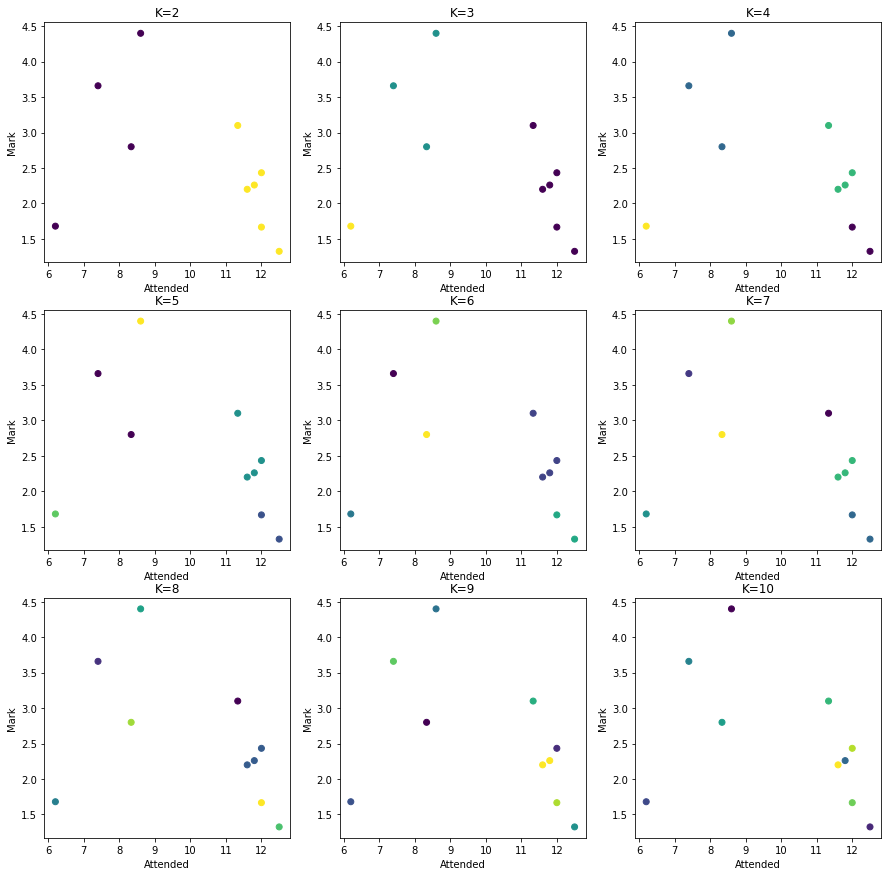

In [57]:
plt.figure(figsize=(15,15))
for k in range(2,11):
    model = KMeans(n_clusters=k)
    pred = model.fit_predict(data2[['Attended','Mark']])
    
    plt.subplot(3,3,k-1)
    plt.title(f'K={k}')
    plt.xlabel('Attended')
    plt.ylabel('Mark')
    plt.scatter(data2['Attended'],data2['Mark'],c=pred)

In [58]:
# 군집분석
model = KMeans(n_clusters=7)
pred = model.fit_predict(data2[['Attended','Mark']])
pred

array([4, 6, 0, 2, 1, 0, 5, 0, 4, 3])

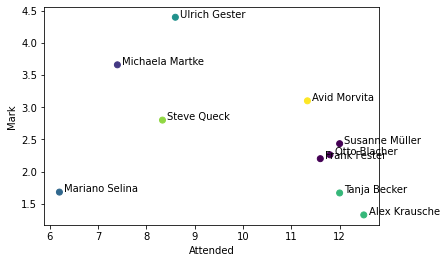

In [59]:
# 시각화 - 각 학생 이름 표시
for name,Mark,Attended in data2.itertuples():
    plt.annotate(f'{name}',(Attended+0.1,Mark))
plt.scatter(data2['Attended'],data2['Mark'],c=pred)
plt.xlabel('Attended')
plt.ylabel('Mark')
plt.show()